# Chapter 12 [회귀분석]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('../../../Source/누구나 파이썬 통계분석/source/python_stat_sample-master/data/ch12_scores_reg.csv')
n = len(df)
print(n)
df.head()

20


,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk


## 12.1 단순회귀모형

***회귀분석(regression analysis)**<br>
: 인과관계가 의심되는 복수의 변수를 사용하요 어느 변수로부터 다른 변후의 값을 예측하는 기법<br>
<br>
**독립변수(independent variable)** : 원인이 되는 변수<br>
**종속변수(dependent variable)** : 결과가 되는 변수

***단순회귀모형(simple regression analysis)** : 회귀분석에서 독립변수와 종속변수가 1개씩인 가장 단순한 모델

In [3]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

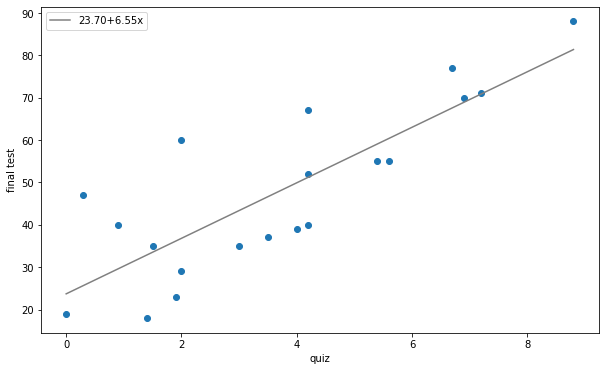

In [4]:
poly_fit = np.polyfit(x, y, 1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('quiz')
ax.set_ylabel('final test')
ax.plot(xs, ys, color='gray', 
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x, y)
ax.legend()

plt.show()

### 12.1.1 회귀분석에서의 가설

<center>$Y_i=\beta_0+\beta_1+\epsilon_i$   $(i=1, 2, ..., n)$</center>

***회귀직선(regression line)**
<center>$y=\hat{\beta_0}+\hat{\beta_1}x$</center><br>

**회귀계수(regressino coefficient)** : $\hat{\beta_0}, \hat{\beta_1}$

### 12.1.2 statsmodels에 의한 회귀분석

In [5]:
formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           8.59e-06
Time:                        14:05:09   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 12.1.3 회귀계수

***잔차(residual)**$ : y_i-\hat{y_i}$<br>
***잔차제곱합(RSS : residual sum of squares)**<br>
<br>
<center>$\sum_i^n\hat\epsilon^2$</center>

- 점추정

In [6]:
X = np.array([np.ones_like(x), x]).T

X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [7]:
beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]

beta0_hat, beta1_hat

<ipython-input-7-a60e3660cc78>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat = np.linalg.lstsq(X, y)[0]


(23.699495346731215, 6.5537326060430825)

In [8]:
y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

In [9]:
s_var = np.var(eps_hat, ddof=p+1)
s_var

134.290434734959

- 구간추정

In [10]:
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

****회귀계수의 신뢰구간***<br>
회귀계수 $\beta_0, \beta_1$의 신뢰수준 $100(1-\alpha)$%의 신뢰구간은<br>
<br>
<center>$[\hat\beta_i-t_{\alpha/2}(n-2)\sqrt{\hat{\sigma}^2C_i}, \hat\beta_i-t_{(1-\alpha/2)}(n-2)\sqrt{\hat{\sigma}^2C_i}]$   $(i=0, 1)$</center>

In [11]:
np.sqrt(s_var * C0), np.sqrt(s_var * C1)

(4.713837012645705, 1.0685841387335373)

In [12]:
rv = stats.t(n-2)

lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)
lcl, hcl

(13.796091272760249, 33.60289942070218)

In [13]:
rv = stats.t(n-2)

lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)
lcl, hcl

(4.308720637125891, 8.798744574960274)

- $t$ 검정

검정통계량<br>
<center>$t=\frac{\hat\beta_1-\beta_1}{\sqrt{\hat\sigma^2C_1}}$</center>

귀무가설에서 $\beta_1=0$이므로<br>
<center>$t=\frac{\hat\beta_1}{\sqrt{\hat\sigma^2C_1}}$</center>

In [14]:
t = beta1_hat / np.sqrt(s_var * C1)

t

6.133099274532022

In [15]:
(1 - rv.cdf(t)) * 2

8.590875866687497e-06

In [16]:
t = beta0_hat / np.sqrt(s_var * C0)
t

5.027644206440128

In [17]:
(1 - rv.cdf(t)) * 2

8.745298393209033e-05

## 12.2 중회귀모형

***중회귀모형(multiple regression model)** : 설명변수가 2개 이상인 회귀모형

In [18]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           6.19e-06
Time:                        14:05:09   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 12.2.1 회귀계수

In [19]:
x1 = df['quiz']
x2 = df['sleep_time']
y = df['final_test']
p = 2

In [20]:
X = np.array([np.ones_like(x1), x1, x2]).T
beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]

beta0_hat, beta1_hat, beta2_hat

<ipython-input-20-b89b5e76aa72>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat, beta2_hat = np.linalg.lstsq(X, y)[0]


(-1.8709143470995935, 6.428878343002369, 4.191706546398685)

In [21]:
y_hat = beta0_hat + beta1_hat * x1 + beta2_hat * x2
eps_hat = y - y_hat

In [22]:
s_var = np.sum(eps_hat ** 2) / (n - p - 1)
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T, X)))

In [23]:
rv = stats.t(n-p-1)

lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var * C2)
hcl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var * C2)
lcl, hcl

(0.4402533325435001, 7.94315976025387)

### 12.2.2 가변수

**가변수(dummy variable)** : 질적변수를 변환하여 양적변수와 동일하게 취급할 수 있게 하는 기법

In [24]:
formula = 'final_test ~ quiz + sleep_time + school_method'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           7.47e-05
Time:                        14:05:09   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.3330     12.434      0.107      0.916     -25.169      27.835
school_method[T.bus]     -1.8118      6.324     -0.286      0.778     -15.292      11.668
school_method[T.walk]    -7.6555      6.420     -1.192      0.252     -21.339       6.028
quiz                      6.0029      1.033      5.809      0.000       3.800       8.206
sleep_time                4.5238      1.809      2.501      0.024       0.668       8.380
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.989
Skew:                           0.545   Prob(JB):                        0.610
Kurtosis:                       2.985   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 12.3 모형의 선택

In [25]:
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           8.59e-06
Time:                        14:05:09   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
y_hat = np.array(result.fittedvalues)

y_hat

array([51.225, 70.886, 23.699, 43.361, 33.53 , 29.598, 36.152, 46.638,
       49.914, 59.09 , 51.225, 68.92 , 36.807, 81.372, 25.666, 67.61 ,
       51.225, 60.4  , 32.875, 36.807])

In [27]:
eps_hat = np.array(result.resid)

eps_hat

array([ 15.775,   0.114,  -4.699,  -8.361,   1.47 ,  10.402, -13.152,
        -9.638, -10.914,  -4.09 , -11.225,   1.08 ,  -7.807,   6.628,
        21.334,   9.39 ,   0.775,  -5.4  , -14.875,  23.193])

In [28]:
# 잔차제곱합
np.sum(eps_hat ** 2)

2417.2278252292626

### 12.3.1 결정계수

**결정계수(R-squared)** : 모형의 데이터에 대한 적합도를 나타내는 기본적인 지표로, $R^2$로 표기

- **총변동(total variation)**<br>
<br>
$\sum_{i=1}^n(y_i-\bar{y})^2$<br>
<br>
- **회귀변동(regression variation)**<br>
<br>
$\sum_{i=1}^n(\hat{y_i}-\bar{y})^2$<br>
<br>
- **잔차변동(residual variation)**<br>
<br>
$\sum_{i=1}^n\hat\epsilon_i^2$<br>
<br>
- <span style="color:blue">**총변동 = 회귀변동 + 잔차변동**</span>

<center>$R^2=\frac{회귀변동}{총변동}=1-\frac{잔차변동}{총변동}$</center>

In [29]:
total_var = np.sum((y - np.mean(y))**2)
exp_var = np.sum((y_hat - np.mean(y))**2)
unexp_var = np.sum(eps_hat ** 2)

In [30]:
total_var, exp_var + unexp_var

(7468.55, 7468.5499999999965)

In [31]:
exp_var / total_var

0.6763457665504996

In [32]:
np.corrcoef(x, y)[0, 1] ** 2

0.6763457665505004

### 12.3.2 조정결정계수

**조정결정계수(adjusted R-square)**<br>
: 설명변수를 추가했을 때 그 설명변수에 어느 정도 이상의 설명력이 없는 경우 결정계수의 값이 증가하지 않도록 조정하는 결정계수<br>
<br>
<center>$\bar{R}^2=1-\frac{잔차변동/{(n-p-1)}}{총변동/{n-1}}$</center>

In [33]:
1 - (unexp_var / (n - p - 1)) / (total_var / (n - 1))

0.6583649758033057

### 12.3.3 $F$검정

---

귀무가설 : $\beta_1=\beta_2=...=\beta_p=0$<br>
대립가설 : 적어도 하나의 $\beta_i$는 0이 아니다.

---
<br>
<center>$F=\frac{회귀변동/p}{잔차변동/{(n-p-1)}}$</center>

In [34]:
f = (exp_var / p)  / (unexp_var / (n - p - 1))

f

37.61490671126521

In [35]:
rv = stats.f(p, n-p-1)
1 - rv.cdf(f)

8.590875866687497e-06

### 12.3.4 최대로그우도와 AIC

- 우도

**우도(likelihood)** : 어떤 관측값을 얻을 확률<br>
<br>
<center>$L=\Pi_{i=1}f(x_i)$</center><br>
<br>
<center>$logL=\sum_{i=1}log f(x_i)$</center><br>

In [36]:
prob = 0.3
coin_result = [0, 1, 0, 0, 1]

rv = stats.bernoulli(prob)
L = np.prod(rv.pmf(coin_result))

L

0.030869999999999995

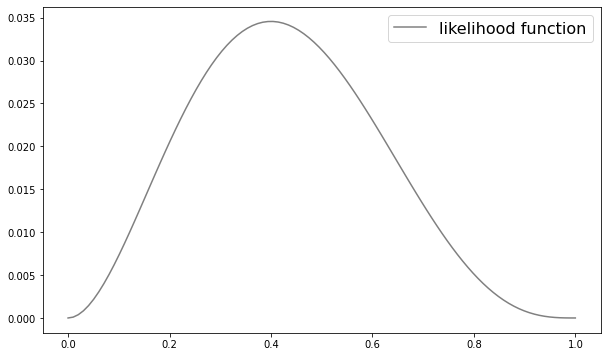

In [37]:
ps = np.linspace(0, 1, 100)
Ls = [np.prod(stats.bernoulli(prob).pmf(coin_result))
      for prob in ps]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(ps, Ls, label='likelihood function', color='gray')
ax.legend(fontsize=16)
plt.show()

In [38]:
prob = 0.4
rv = stats.bernoulli(prob)
mll = np.sum(np.log(rv.pmf([0, 1, 0, 0, 1])))

mll

-3.365058335046282

- **최대로그우도(maximum log-likelihood)**<br>
<br>
$N(\hat{y}, \frac{1}{n}\sum_{i=1}^n\hat\epsilon_i)$의 밀도함수를 $f(x)$로 하여<br>
<br>
<center>$\sum_{i=1}^nlogf(y_i)$</center>

In [39]:
rv = stats.norm(y_hat, np.sqrt(unexp_var / n))
mll = np.sum(np.log(rv.pdf(y)))
mll

-76.32521428624038

- AIC

**AIC(Akaike's information criterion)** : 모형의 복잡도(설명변수의 수)와 데이터에 대한 적합도의 균형을 잡는 지표<br>
<br>
<center>$AIC=-2×최대로그우도+2×회귀계수의 수$</center>

In [40]:
aic = -2 * mll + 2 * (p+1)

aic

156.65042857248076

- 베이지안 정보 기준

**베이지안 정보 기준(Bayesian information criterion, BIC)**<br>
<br>
<center>$BIC=-2×최대로그우도+logn×회귀계수의 수$</center>

In [41]:
bic = -2 * mll + np.log(n) * (p+1)

bic

158.64189311958876

## 12.4 모형의 타당성

모형의 타당성<br>
: 처음에 회귀분석에 관해서 세운 '오차항 $\epsilon_i$는 서로 독립이고 $N(0, \sigma^2)$을 따른다.'라는 가정을 만족하고 있는지 여부를 체크하는 것

In [42]:
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           6.19e-06
Time:                        14:05:10   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
eps_hat = np.array(result.resid)

### 12.4.1 정규성 검정

In [44]:
# 왜도
stats.skew(eps_hat)

0.660

In [45]:
# 첨도
stats.kurtosis(eps_hat, fisher=False)

2.437

### 12.4.2 더빈-왓슨비

**더빈-왓슨비(Durbin_Watson ratil)** : 다른 오차항이 서로 무상관인지 여부를 체크하는 지표<br>
<br>
데이터가 <span style="color:orange">**시계열 데이터**</span>인 경우에 특히 중요한 데이터

In [46]:
np.sum(np.diff(eps_hat, 1) ** 2) / np.sum(eps_hat ** 2)

1.5082185264423011

### 12.4.3 다중공선성

In [47]:
df['mid_test'] = df['quiz'] * 2

df.head()

,quiz,final_test,sleep_time,school_method,mid_test
0,4.2,67,7.2,bus,8.4
1,7.2,71,7.9,bicycle,14.4
2,0.0,19,5.3,bus,0.0
3,3.0,35,6.8,walk,6.0
4,1.5,35,7.5,walk,3.0


In [48]:
formula = 'final_test ~ quiz + mid_test'
result = smf.ols(formula, df).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           8.59e-06
Time:                        14:05:10   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           1.3107      0.214      6.133      0.000       0.862       1.760
mid_test       2.6215      0.427      6.133      0.000       1.723       3.519
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                     1.11e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.58e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""